# Database Exploration

This notebook allows for easy exploration of the contents of the /data folder.

It is mainly design for use with the Ninapro databases and databases which are setup in similar fashion.

In [1]:
import src
from scipy.io import loadmat, whosmat
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt 
import os
import pandas as pd
import plotly.express as px
from src import config
import os
import re

Explore a dataset general information. It will output a summary for each file found in a subject.

In [2]:
# Choose the database to analyze
database = 'DB4'

data_path = f'data/{database}'

# Find the folder named with the convention s + "number"
folder = None
for item in os.listdir(data_path):
    if re.match(r'[sS]\d+', item) or re.match(r'Subject\d+', item):
        folder = item
        break

if folder:
    folder_path = os.path.join(data_path, folder)
    results = []

    # Iterate over all .mat files in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.mat'):
            file_path = os.path.join(folder_path, file_name)
            info = whosmat(file_path)
            results.append((file_name, info))

    # Create a DataFrame to store the results
    data = {}
    for file_name, info in results:
        for item in info:
            if item[0] not in data:
                data[item[0]] = {}
            data[item[0]][file_name] = item[1:]

    df = pd.DataFrame(data)
    df = df.transpose()
    df.columns.name = 'File Name'

    print(df)
else:
    print("No folder found with the convention s + 'number'")

File Name                 S1_E1_A1.mat             S1_E2_A1.mat  \
emg            ((1239383, 12), single)  ((1760957, 12), single)   
stimulus          ((1239383, 1), int8)     ((1760957, 1), int8)   
subject               ((1, 1), double)         ((1, 1), double)   
repetition        ((1239383, 1), int8)     ((1760957, 1), int8)   
age                   ((1, 1), double)         ((1, 1), double)   
exercise              ((1, 1), double)         ((1, 1), double)   
circumference         ((1, 1), double)         ((1, 1), double)   
frequency             ((1, 1), double)         ((1, 1), double)   
gender                    ((1,), char)             ((1,), char)   
height                ((1, 1), double)         ((1, 1), double)   
weight                ((1, 1), double)         ((1, 1), double)   
laterality                ((1,), char)             ((1,), char)   
sensor                    ((1,), char)             ((1,), char)   
restimulus      ((1239383, 1), double)   ((1760957, 1), double

In [3]:
filename = 'S1_E1_A1.mat'
subject  = 's1'
mat_file = src.loadmatNina(database, filename, subject=subject)

Loaded file: S1_E1_A1.mat
Total test time: 619.6915 seconds
Total test time: 10.328191666666667 minutes
Unique restimulus values: [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
Total EMG samples: 14872596.0
Frequency: 2000 Hz
Summary for the whole file:
        __globals__           emg      stimulus  subject    repetition   age  \
25%             NaN -8.996921e+01  0.000000e+00      1.0  0.000000e+00  29.0   
50%             NaN -4.555057e+00  3.000000e+00      1.0  2.000000e+00  29.0   
75%             NaN  7.687926e+01  8.000000e+00      1.0  4.000000e+00  29.0   
count           0.0  1.487260e+07  1.239383e+06      1.0  1.239383e+06   1.0   
freq            NaN           NaN           NaN      NaN           NaN   NaN   
max             NaN  3.011400e+04  1.200000e+01      1.0  6.000000e+00  29.0   
mean            NaN -5.482289e+00  4.090893e+00      1.0  2.203224e+00  29.0   
min             NaN -2.516700e+04  0.000000e+00      1.0  0.000000e+00  29.0   
std             NaN  7.292349e+0

###### analizar tiempo de respuesta entre "stimulus" y "restimulus"

In [15]:
import os
from src import loadmatNina  # Importa la función loadmatNina

# Nombre de la base de datos (coincide con DATABASE_INFO)
database = 'DB4'

# Ruta completa a la carpeta DB4
data_path = os.path.abspath(os.path.join('data', database))

# Lista de sujetos
subjects = [f's{i}' for i in range(1, 11)]

# recorrer cada sujeto
for subject in subjects:
    subject_path = os.path.join(data_path, subject)  # Ruta de la carpeta s1, s2, etc.

    # Lista de nombres de archivos específicos
    filenames = [f"{subject.upper()}_E1_A1.mat",
                 f"{subject.upper()}_E2_A1.mat",
                 f"{subject.upper()}_E3_A1.mat"]

    # recorrer cada archivo
    for filename in filenames:
        file_path = os.path.join(subject_path, filename)
        
        # Verificar si el archivo existe
        if os.path.isfile(file_path):
            print(f"Loading file: {file_path}")
            mat_file = loadmatNina(database, filename, subject=subject)
        else:
            print(f"File not found: {file_path}")


Loading file: c:\Users\fer13\OneDrive\Documentos\UNIVERSIDAD\PRACTICAS\CODIGO\IA_ProsthesisUdeA\data\DB4\s1\S1_E1_A1.mat
Loaded file: S1_E1_A1.mat
Total test time: 619.6915 seconds
Total test time: 10.328191666666667 minutes
Unique restimulus values: [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
Total EMG samples: 14872596.0
Frequency: 2000 Hz
Summary for the whole file:
        __globals__           emg      stimulus  subject    repetition   age  \
25%             NaN -8.996921e+01  0.000000e+00      1.0  0.000000e+00  29.0   
50%             NaN -4.555057e+00  3.000000e+00      1.0  2.000000e+00  29.0   
75%             NaN  7.687926e+01  8.000000e+00      1.0  4.000000e+00  29.0   
count           0.0  1.487260e+07  1.239383e+06      1.0  1.239383e+06   1.0   
freq            NaN           NaN           NaN      NaN           NaN   NaN   
max             NaN  3.011400e+04  1.200000e+01      1.0  6.000000e+00  29.0   
mean            NaN -5.482289e+00  4.090893e+00      1.0  2.203224e+00 

#### Separar por canales

Rest included in the movement extraction!
Filtered EMG data shape: (97291, 12)
Filtered restimulus data shape: (97291, 1)
test time: 48.6455 seconds
Number of Repetitions: 6


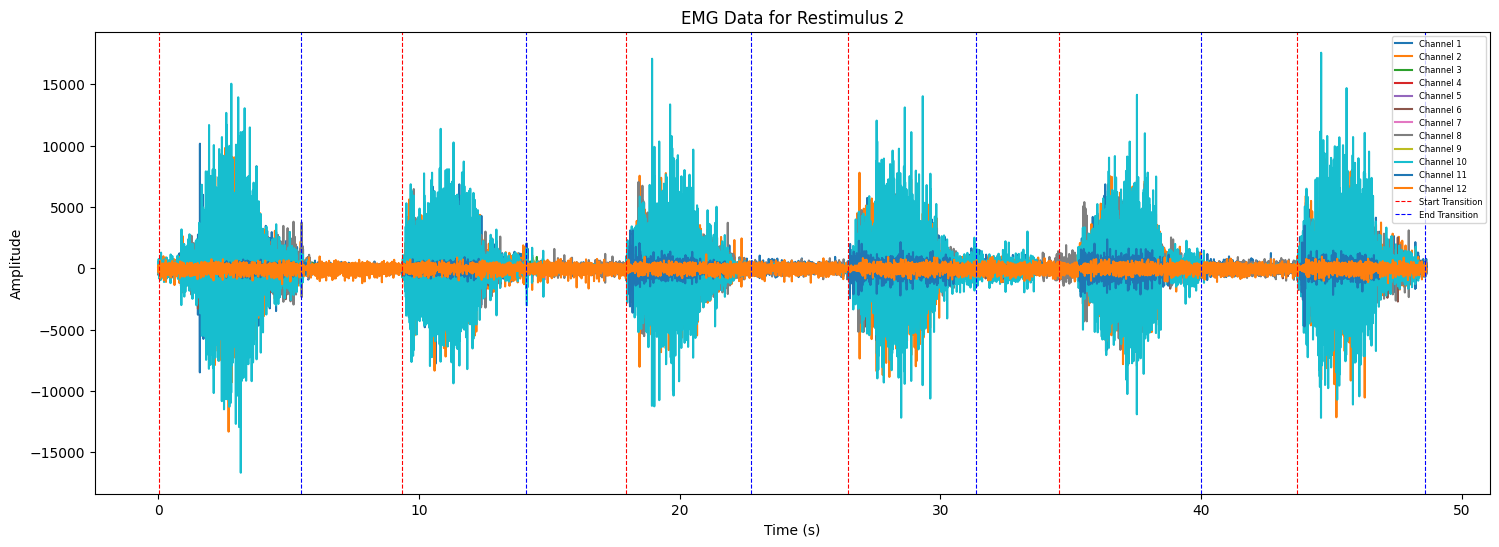

In [4]:
grasp = 2
src.plot_emg_data(database, mat_file, grasp, interactive=False, include_rest=True, use_stimulus=False, addFourier = False, padding = 100)

### Feature Calculation and Database Relabeling for Ninapro

#### Overview
This script demonstrates how to import EMG data and stimulus data, along with a sample calculation of features. The following parameters can be customized:
- **Window size**
- **Padding (zeroes)** 
- **Labeling thresholds**

#### Relabeling Ninapro Databases
To maintain consistency across databases, **Databases 1, 4, and 5** require relabeling to match the convention used in the other databases. The script reorganizes **Exercise A** to appear last in the database, resulting in the following grasp numbering:

- **1 - 17:** Exercise B  
- **18 - 40:** Exercise C  
- **41 - 49:** Exercise D  
- **50 - 61:** Exercise A  
- **0:** Rest  


In [5]:
test_df, grasps = src.build_dataframe(mat_file, database, filename, rectify= False, normalize = True)
test_df.head()

new exercise label: A
Relabeling performed for exercise 1 of DB4.
Unique restimulus values: [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
New restimulus values in Relabeled: [ 0 50 51 52 53 54 55 56 57 58 59 60 61]


,Channel 1,Channel 2,Channel 3,Channel 4,Channel 5,Channel 6,Channel 7,Channel 8,Channel 9,Channel 10,Channel 11,Channel 12,Time (s),subject,re_repetition,stimulus,relabeled
0,-0.080867,-0.026702,-0.184377,0.137110,0.139846,0.129581,0.317491,-0.030544,-0.047140,0.037009,0.227168,-0.273095,0.0000,[[1]],1,0,0
1,-0.015037,-0.036833,0.122537,0.289744,-0.137724,0.061688,0.185393,-0.071280,-0.062437,-0.032694,0.317192,-0.444086,0.0005,[[1]],1,0,0
2,-0.006427,0.005738,-0.046464,0.254572,0.123655,-0.044213,0.190557,-0.108251,-0.167532,0.018729,0.225799,-0.231815,0.0010,[[1]],1,0,0
3,-0.033116,-0.014365,-0.187194,-0.024231,0.042588,0.082919,0.121809,-0.071325,-0.013023,0.004729,0.233412,0.210490,0.0015,[[1]],1,0,0
4,-0.073164,0.055598,0.135732,0.155109,0.048102,0.080464,0.182560,-0.081284,0.030957,0.022244,0.261616,0.086686,0.0020,[[1]],1,0,0


In [7]:
dataframe_new = src.db_utils.filter_data_pandas(test_df, 50, include_rest=False, padding = 0)
dataframe_new.head()

Extracting data without rest!


,Channel 1,Channel 2,Channel 3,Channel 4,Channel 5,Channel 6,Channel 7,Channel 8,Channel 9,Channel 10,Channel 11,Channel 12,Time (s),subject,re_repetition,stimulus,relabeled
7175,-0.107108,0.040313,-0.065545,0.026278,-0.012218,0.165020,0.313963,0.066651,0.137520,0.084501,-0.126716,-1.667177,3.5875,[[1]],1,1,50
7176,-0.212106,0.023810,0.253179,-0.046291,-0.041200,0.182136,0.183117,0.061050,-0.039742,0.153047,-0.125627,-0.762613,3.5880,[[1]],1,1,50
7177,-0.243028,0.003368,-0.209694,-0.097748,0.229128,0.250360,0.089951,0.000052,0.068226,0.180043,0.190132,-0.420801,3.5885,[[1]],1,1,50
7178,-0.188926,0.005273,-0.077164,-0.047693,0.225346,0.185262,0.352294,-0.051849,0.008957,0.143179,-0.124384,-0.261617,3.5890,[[1]],1,1,50
7179,-0.051744,-0.071548,0.221056,-0.152564,0.178701,0.229058,0.113869,-0.055702,-0.064277,0.141193,0.025429,-0.451947,3.5895,[[1]],1,1,50


Rest included in the movement extraction!
Filtered EMG data shape: (96174, 17)
test time: 48.087 seconds


TypeError: Input must be a pandas DataFrame or a numpy array

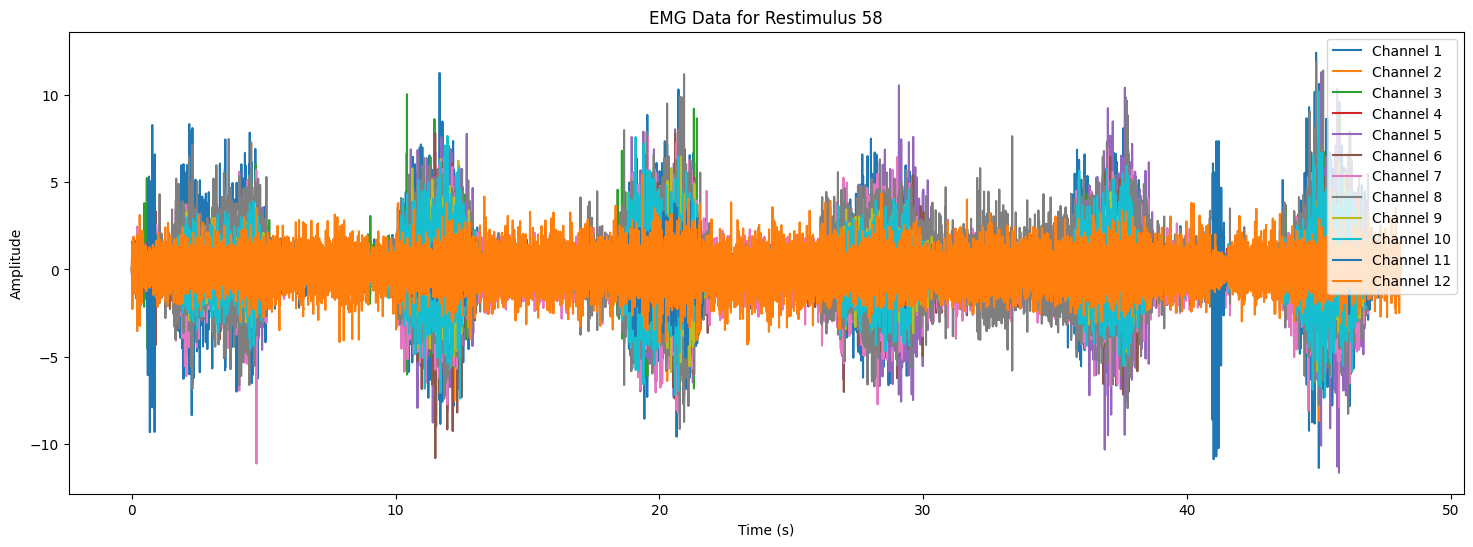

In [8]:
grasp = 58
src.plot_emg_dataframe(database, test_df, grasp, interactive=False, include_rest=True, use_stimulus=True, addFourier = True)

In [10]:

segmented_re_stimulus = src.get_signal_by_movement_complete(re_stimulus, filtered_start_index_re_stimulus[str(movement)]) #Gets the signal of the movement
windows_re_stimulus = src.create_windows_with_overlap(segmented_re_stimulus, window_length, overlapping)
labels = []
for window in windows_re_stimulus:
    label = src.get_label(window, threshold, movements_label, database)
    labels.append(label)
emg_signals = []
for electrode in range(electrodes):
    segmented_emg_signal = src.get_signal_by_movement_complete(emg[:, electrode], filtered_start_index_re_stimulus[str(movement)])
    filtered_segmented_emg_signal = src.get_envelope_filtered(segmented_emg_signal, fc, fm)
    windows_emg_electrode = src.create_windows_with_overlap(filtered_segmented_emg_signal, window_length, overlapping)
    emg_signals.append(windows_emg_electrode)
windows_quantity  = len(emg_signals[0])
if (windows_quantity != len(labels)):
    print('Different longitude in labels with electrodes', movement, individual, database) #This is used to check the windows between labels and windows in electrodes
    raise ValueError('No es compatible')
for index_label,label in enumerate(labels):
    if not label:
        print(label)
    data_label = {
        'label': label,
    }
    for index_electrode, element in enumerate(emg_signals):
        if len(element) != windows_quantity:
            print('Different longitude in electrodes', index_electrode, movement, individual, database) #This is used to find any signal with different number of window
            raise ValueError('No es compatible')
        for feature, function in features.items():
            feature_calculus = function(element[index_label])
            data_label[feature+str(index_electrode+1)] = np.array([feature_calculus])
    new_data_label = pd.DataFrame(data_label)
    signals_features = pd.concat([signals_features, new_data_label], ignore_index=True)


NameError: name 're_stimulus' is not defined